In [13]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List

# Práctica 2: Preprocesamiento Básico

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye un dataset real. El dataset importado incluye multiples características que describen las condiciones de los pasajeros en el accidente del titanic.

- __PassengerId__: Identificador de cada pasajero.
- __Survived__: 0 si no sobrevivió al accidente, 1 si lo hizo.
- __Pclass__: Clase en la que viajaba el pasajero, 1 - Primera clase, 2 - Segunda clase y 3 - Tercera clase.
- __Name__: Nombre del pasajero.
- __Sex__: Sexo del pasajero.
- __Age__: Edad del pasajero.
- __SibSp__: Número de hermanos más número de esposas con las que viajaba el pasajero.
- __Parch__: Número de padres más número de hijos con las que viajaba el pasajero.
- __Ticket__: Número de boleto.
- __Fare__: Tarifa del boleto del pasajero.
- __Cabin__: Número de cabina del pasajero.
- __Embarked__: Puerto de embarcación, C - Cherbourg, Q - Queenstown y S - Southampton.


In [15]:
df = pd.read_csv("titanic.csv")
print(df.shape)
df.head(3)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Asignación 1 &#x1F625;

En una sola figura grafique el histograma de la edad, el histograma de la edad centrado en una media de 0 y desviación estándar de 1, y el histograma de la edad acotado a que el valor mínimo sea 0 y el máximo sea 1.

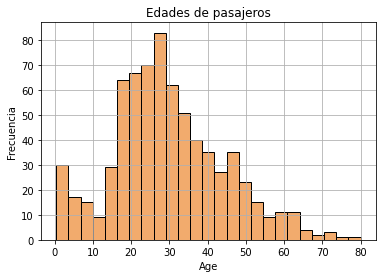

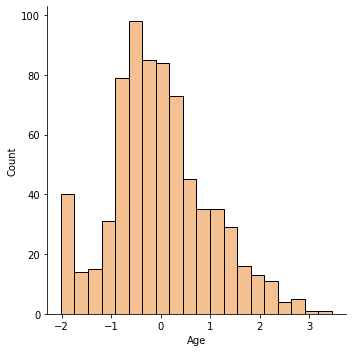

In [16]:
# Histograma de la edad 

plt.title('Edades de pasajeros')
plt.hist(df['Age'], bins = 25 , color='#F2AB6D' , edgecolor = 'black',  linewidth=1 )
plt.xlabel("Age")
plt.ylabel("Frecuencia")
plt.grid(True) # Pone las rejas 

# Histograma de la edad centrado en una media de 0 y con una desviación estándar de 1

sns.displot((df["Age"] - df["Age"].mean())/df["Age"].std(), color='#F2AB6D' , edgecolor = 'black',  linewidth=1 )

<AxesSubplot:>

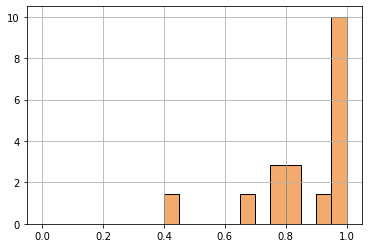

In [17]:
# Histograma de la edad acotada entre 0 y 1

df['Age'].hist(bins=20, density=True, range=(0,1),color='#F2AB6D' , edgecolor = 'black',  linewidth=1)

# GRÁFICOS EN UNA SOLA LÍNEA

<function matplotlib.pyplot.show(close=None, block=None)>

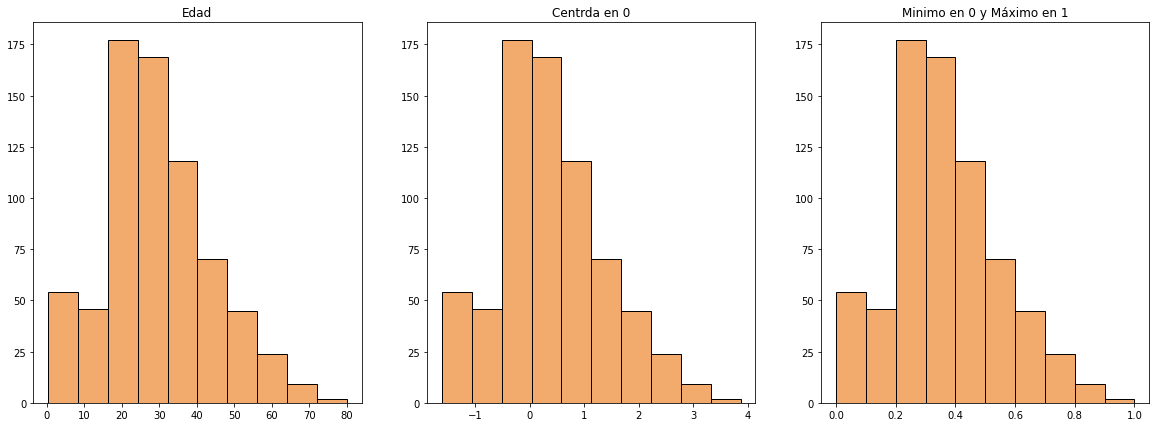

In [18]:

# Debemos tener un caculo normalizado:
edad = df.Age
mean_edad = np.sum(edad) / len(edad)
std_edad = np.std(edad)
rs = (edad - mean_edad) / std_edad
# sns.histplot(((edad - mean_edad) / std_edad), label = 'mean = 0') # Histograma para visualizar la edad - la mediad de la edad

# Calculo del minimo en 0 y maximo en 1
minimo_maximo = (edad - np.amin(edad)) / (np.amax(edad) - np.amin(edad))

# Histogramas

fig, (ax, ax1, ax2) = plt.subplots(ncols = 3)
ax.hist(edad, color='#F2AB6D' , edgecolor = 'black',  linewidth=1 )
ax.set_title('Edad')

ax1.hist(rs, color='#F2AB6D' , edgecolor = 'black',  linewidth=1)
ax1.set_title('Centrda en 0')

ax2.hist(minimo_maximo, color='#F2AB6D' , edgecolor = 'black',  linewidth=1)
ax2.set_title('Minimo en 0 y Máximo en 1')

fig.set_size_inches(20.0,7.0)
plt.show



## Asignación 2 &#x1F625;

Calcule e imprima el skewness de la tarifa. Grafique su histograma. Aplique la función de su preferencia para remover el skewness, calcule e imprima el valor del skewness para la función transformada y grafique su histograma.

In [19]:
def remover_skewness(data : pd.Series, log_nat : bool):

    # Calculo del skewness
    skewn = ((data - np.mean(data)) / np.std(data)) ** 3
    print('Nivel de Skewness sin modificacion:', np.mean(skewn))   
     
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.histplot(x=data, kde=True, line_kws={'linestyle' : 'dashed',
                                                     'linewidth' : '2'},color='#F2AB6D' , edgecolor = 'black',  linewidth=1).lines[0].set_color('red')
    plt.show()
    
    
    if log_nat:
        # Aplicamos el logaritmo natural
        data_mod = np.log1p(data)
        
        # Calculo de skewn
        skewn = np.mean(((data_mod - np.mean(data_mod)) / np.std(data_mod)) ** 3)
        
        # Grafico 
        fig, ax = plt.subplots(figsize=(10, 5))
        print('Histograma con logaritmo natural, skewnes=:', skewn)
        # ax.hist(data_mod)
        sns.histplot(x=data_mod, kde=True, line_kws={'linestyle' : 'dashed',
                                                     'linewidth' : '2'},color='#F2AB6D' , edgecolor = 'black',  linewidth=1).lines[0].set_color('red')
    else:
        # Comvertimos los datos con raiz cuadrada
        data_mod = np.sqrt(data)
        
        # Calculamos el skewness
        skewn = np.mean(((data_mod - np.mean(data_mod)) / np.std(data_mod)) ** 3)
        
        # Grafico
        fig, ax = plt.subplots(figsize=(10,5))
        # ax.hist(data_mod)
        sns.histplot(x=data_mod, kde=True, line_kws={'linestyle' : 'dashed',
                                                     'linewidth' : '2'},color='#F2AB6D' , edgecolor = 'black',  linewidth=1).lines[0].set_color('red')
        print('Histograma con datos modificados con raíz cuadrada, skewness',skewn)

Nivel de Skewness sin modificacion: 4.779253292372355


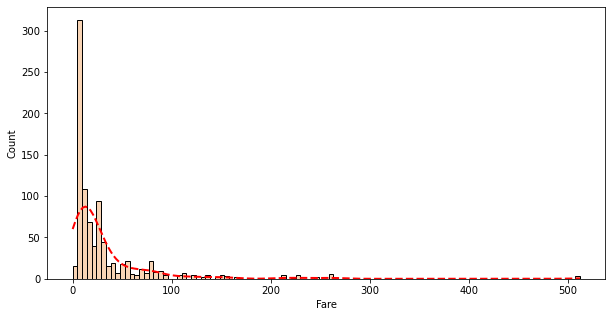

Histograma con logaritmo natural, skewnes=: 0.39426283638994675
Nivel de Skewness sin modificacion: 4.779253292372355


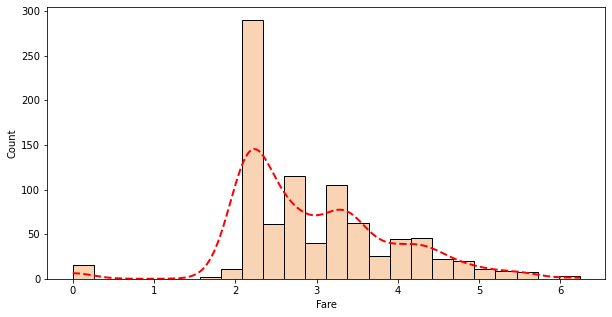

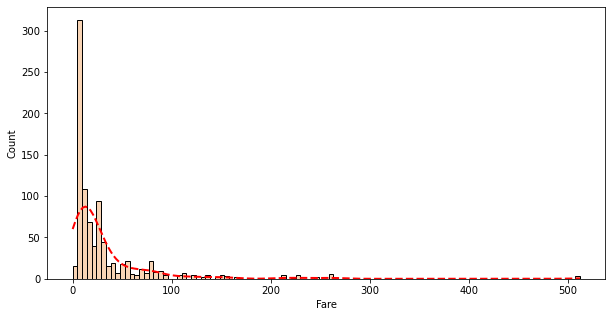

Histograma con datos modificados con raíz cuadrada, skewness 2.0814926669985923


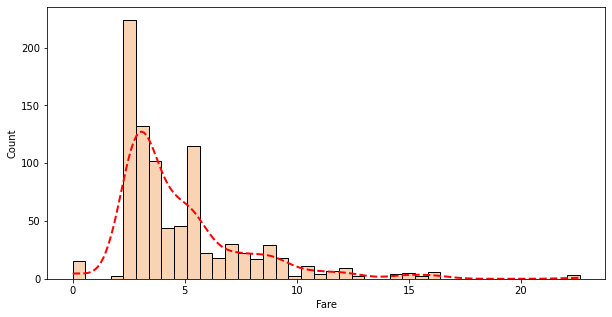

In [20]:
remover_skewness(df.Fare, True)
remover_skewness(df.Fare, False)

## Asignación 3 &#x1F921;

Convierta la características __Sex__ y __Embarked__ a su versión de One hot encoding y agreguelas al dataframe original.

In [21]:
sex_onehot = pd.get_dummies(df.Sex) # Columna codificadas de Sex con one hot
embarked_onehot = pd.get_dummies(df.Embarked) # Columna codificadas de Embarked con one hot

# Junta de columnas con one hot y el dataset original
df = df.join(sex_onehot)
df = df.join(embarked_onehot)

df_onehot = df.drop(['Sex', 'Embarked'], axis=1) 

df_onehot # Visualizamos el nuevo dataset

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,1,1,0,0


In [22]:
# Visualización del dataset original

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,1,0,0


## Asignación 4 &#x1F643;

Implemente PCA dentro de una función (usted debe definirla) y apliquela para gráficar en un scatterplot de dos dimensiones los datos. (No incluya las características __Name__, __Ticket__ y __Cabin__).

In [29]:
def pca(X, n_components=2):
    X_meaned = X - np.mean(X, axis=0) # Calculo de la media de las columnas de X
    cov_matrix = np.cov(X_meaned, rowvar=False) # Calcula la matriz de covarianza de x
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix) # Calcula los eigenvalores y eigen vectores de la matriz de covarianza
    
    # Ordenamiento de lo anterior por mayor a menos y seleccionar componentes principales
    
    sorted_idx = eigenvalues.argsort()[::-1][:n_components]
    sorted_eigenvalues = eigenvalues[sorted_idx]
    sorted_eigenvectors = eigenvectors[:, sorted_idx]
    
    pcs = np.dot(X_meaned, sorted_eigenvectors) # Componentes principales
    
    plt.scatter(pcs[:, 0], pcs[:, 1])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title('PCA')
    plt.show()
    
    return pcs

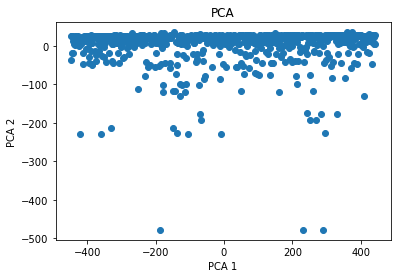

In [30]:
data = df_onehot.drop(['Name', 'Ticket', 'Cabin'], axis ='columns').dropna()
pa = pca(data, 2)